In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow as tf
import torch

1. I collected two pieces of information about Texas economic development over 2009 - 2024: GDP (tx_gdp) and Unemployment rate (tx_ur) and saved them in this csv file. Texas economy.csv Download Texas economy.csv. Import it.

In [2]:
#Importing the Datasets

empinfo = pd.read_excel('/content/Employer Information111.xlsx')
texaseco = pd.read_csv('/content/Texas economy.csv')

In [3]:
#Basic Informations

empinfo.head()
empinfo.info()
empinfo.describe()
empinfo.columns

texaseco.head()
texaseco.info()
texaseco.describe()
texaseco.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89958 entries, 0 to 89957
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Line by line                89958 non-null  object 
 1   Fiscal Year                 89958 non-null  int64  
 2   Employer (Petitioner) Name  89949 non-null  object 
 3   Tax ID                      88567 non-null  float64
 4   Industry (NAICS) Code       78573 non-null  object 
 5   Petitioner City             89958 non-null  object 
 6   Petitioner State            89958 non-null  object 
 7   Petitioner Zip Code         89956 non-null  float64
 8   Initial Approval            89958 non-null  int64  
 9   Initial Denial              89958 non-null  int64  
 10  Continuing Approval         89958 non-null  int64  
 11  Continuing Denial           89958 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 8.2+ MB
<class 'pandas.core.frame.DataF

Index(['Fiscal Year', 'GDP Deflator', 'tx_gdp', 'tx_ur'], dtype='object')

The code you've written performs exploratory data analysis on two data sets: texaseco and empinfo. It utilizes pandas functions to show the top rows, data structure information, descriptive statistics, and column headers of both data sets. The user can easily view the content, structure, and overall statistical characteristics of the data.

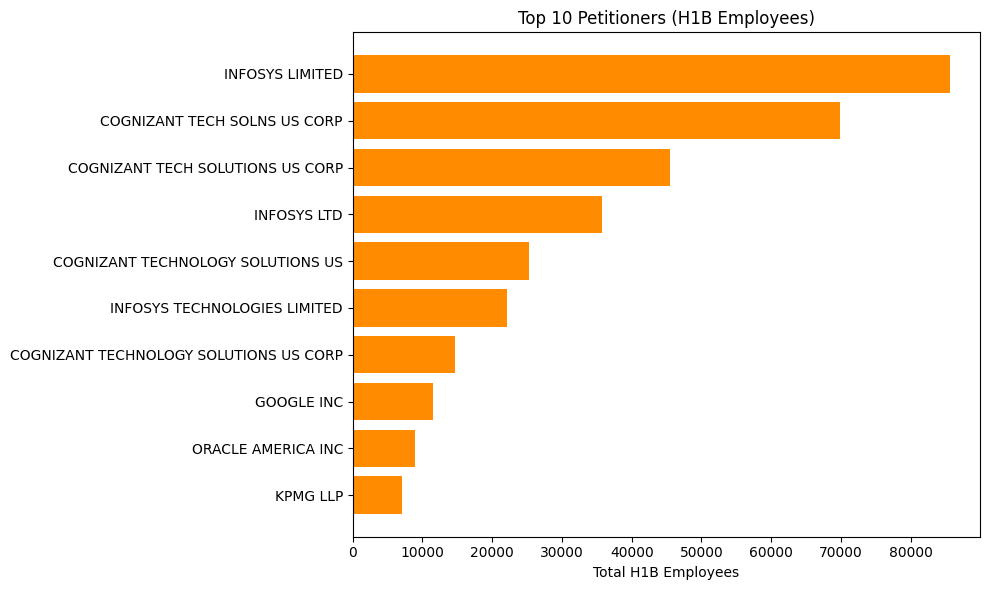

In [4]:
# Calculate Total Employees for the entire DataFrame
empinfo['Total Employees'] = empinfo['Initial Approval'] + empinfo['Continuing Approval']

# Group by petitioner and sum total employees, then sort to find top 10
top10_petitioners = empinfo.groupby('Employer (Petitioner) Name')['Total Employees'].sum().sort_values(ascending=False).head(10).reset_index()

# Bar chart of top 10 petitioners
plt.figure(figsize=(10, 6))
plt.barh(top10_petitioners['Employer (Petitioner) Name'][::-1], top10_petitioners['Total Employees'][::-1], color='darkorange')
plt.xlabel('Total H1B Employees')
plt.title('Top 10 Petitioners (H1B Employees)')
plt.tight_layout()
plt.show()

This script calculates the total H1B employees for each company (petitioner), finds the top 10 companies with the highest H1B employees, and then plots a horizontal bar chart to display this top 10 list.

2. Use the variable 'GDP Deflator' to calculate the real GDP. The variable sets the 2017 dollar value at 100. By dividing the nominal GDP with this deflator, we get the real GDP, all in 2017 dollar value. Please create this real GDP variable.

In [5]:
# Real GDP in 2017 dollars
texaseco['real_gdp'] = texaseco['tx_gdp'] / texaseco['GDP Deflator'] * 100
texaseco[['Fiscal Year', 'tx_gdp', 'real_gdp']].head()


,Fiscal Year,tx_gdp,real_gdp
0,2009,1179168.1,1.331551e+06
1,2010,1255660.8,1.400907e+06
2,2011,1351776.9,1.477659e+06
3,2012,1429588.0,1.534140e+06
4,2013,1526781.9,1.611022e+06


The code calculates Real GDP for Texas by deflating nominal values of GDP by the GDP deflator. The code adds this Real GDP as a new column in the texaseco dataframe and prints the first few rows to verify the result. It enables the comparison of the economic production of Texas in different years after eliminating the effects of inflation.

In [6]:
# Strip all column names of leading/trailing whitespace
empinfo.columns = empinfo.columns.str.strip()

# Approvals by year
approval_by_year = empinfo.groupby('Fiscal Year')[['Initial Approval', 'Continuing Approval']].sum().reset_index()
merged_df = pd.merge(approval_by_year, texaseco, on='Fiscal Year')
merged_df.head()

,Fiscal Year,Initial Approval,Continuing Approval,GDP Deflator,tx_gdp,tx_ur,real_gdp
0,2009,8359,13221,88.556,1179168.1,7.591667,1.331551e+06
1,2010,9432,11039,89.632,1255660.8,8.250000,1.400907e+06
2,2011,11855,17714,91.481,1351776.9,8.033333,1.477659e+06
3,2012,15362,14776,93.185,1429588.0,6.708333,1.534140e+06
4,2013,16484,19820,94.771,1526781.9,6.316667,1.611022e+06


This script cleans column names, rolls up and summarizes approval data by fiscal year, and joins with another dataset for analysis. This allows the study of H1B approvals and Texas economic indicators (e.g., unemployment rate, GDP) over different fiscal years.

3. Calculate the numbers of Initial Approvals and Continuing Approvals of every year. Make graphs that compare each of them with Texas GDP and unemployment rate. What do you find?

In [7]:
initial_total = empinfo['Initial Approval'].sum()
continuing_total = empinfo['Continuing Approval'].sum()

print("Initial Approvals (2024):", initial_total)
print("Continuing Approvals (2024):", continuing_total)


Initial Approvals (2024): 228643
Continuing Approvals (2024): 474524


In [8]:
gdp_2024 = texaseco[texaseco['Fiscal Year'] == 2024]['tx_gdp'].values[0]
real_gdp_2024 = texaseco[texaseco['Fiscal Year'] == 2024]['real_gdp'].values[0]
unemployment_2024 = texaseco[texaseco['Fiscal Year'] == 2024]['tx_ur'].values[0]

print("Nominal GDP (2024):", gdp_2024)
print("Real GDP (2024):", real_gdp_2024)
print("Unemployment Rate (2024):", unemployment_2024)


Nominal GDP (2024): 2709392.9
Real GDP (2024): 2163706.197093116
Unemployment Rate (2024): 4.091666666666668


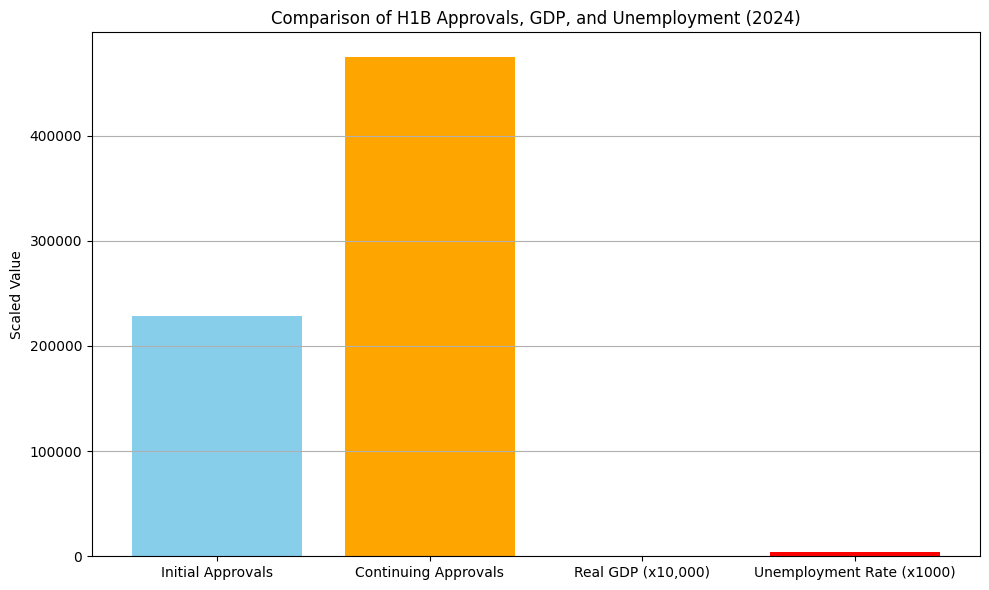

In [9]:
import matplotlib.pyplot as plt

labels = ['Initial Approvals', 'Continuing Approvals', 'Real GDP (x10,000)', 'Unemployment Rate (x1000)']
values = [
    initial_total,
    continuing_total,
    real_gdp_2024 / 10000,
    unemployment_2024 * 1000
]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=['skyblue', 'orange', 'green', 'red'])
plt.title('Comparison of H1B Approvals, GDP, and Unemployment (2024)')
plt.ylabel('Scaled Value')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


The script creates a bar chart for comparing H1B visa approvals (active and new), Real GDP, and the unemployment rate for Texas during 2024. It creates and personalizes the chart by using the matplotlib library, data normalization for purposes of comparison and visualization. It essentially provides a vision of interconnection of these economic indicators.

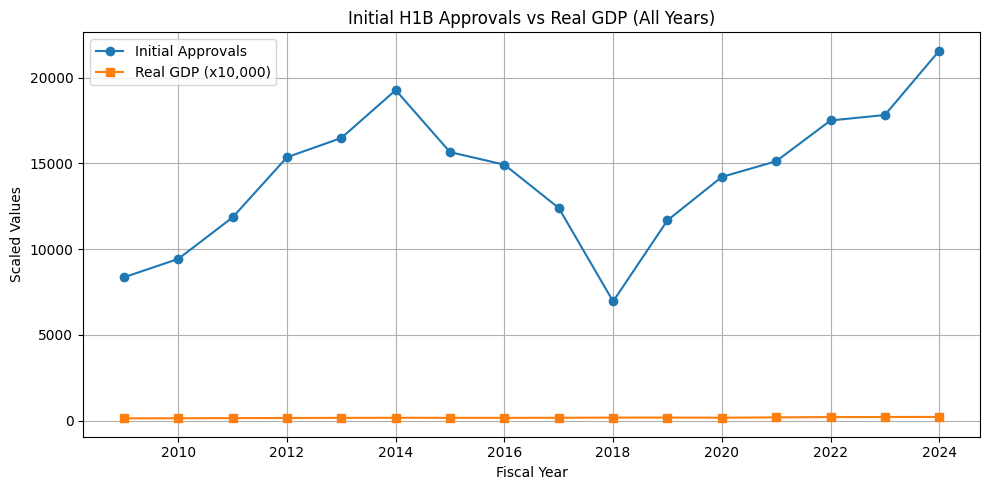

In [10]:
# Initial Approvals vs Real GDP (all years)
plt.figure(figsize=(10, 5))
plt.plot(merged_df['Fiscal Year'], merged_df['Initial Approval'], label='Initial Approvals', marker='o')
plt.plot(merged_df['Fiscal Year'], merged_df['real_gdp'] / 10000, label='Real GDP (x10,000)', marker='s')
plt.title('Initial H1B Approvals vs Real GDP (All Years)')
plt.xlabel('Fiscal Year')
plt.ylabel('Scaled Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


This script creates a line plot of the comparison of the trend of the original H1B visa approvals with the Real GDP of Texas across a series of fiscal years. It plots on a combined dataframe (merged_df) with 'Fiscal Year' on the x-axis and scaled 'Initial Approval' and 'Real GDP' on the y-axis, easy to visually check for coherence between these two metrics over time.

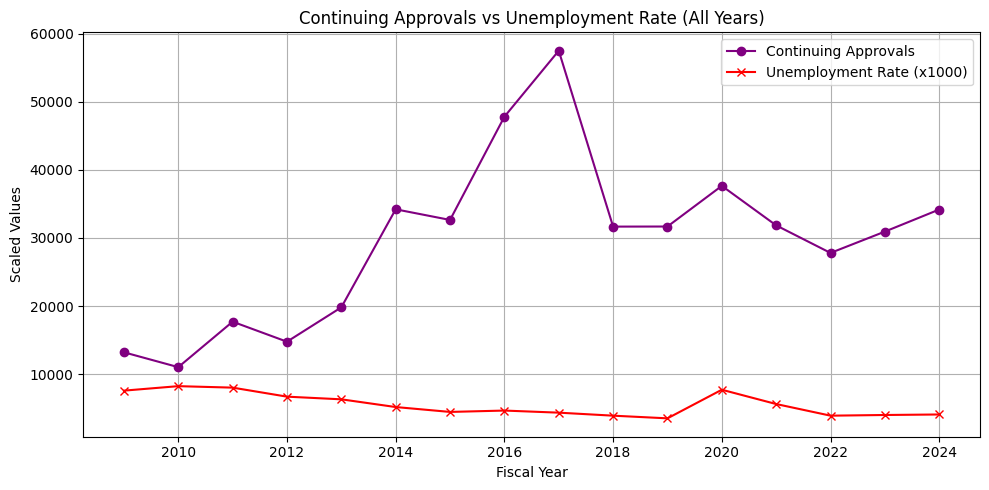

In [11]:
# Continuing Approvals vs Unemployment (all years)
plt.figure(figsize=(10, 5))
plt.plot(merged_df['Fiscal Year'], merged_df['Continuing Approval'], label='Continuing Approvals', marker='o', color='purple')
plt.plot(merged_df['Fiscal Year'], merged_df['tx_ur'] * 1000, label='Unemployment Rate (x1000)', marker='x', color='red')
plt.title('Continuing Approvals vs Unemployment Rate (All Years)')
plt.xlabel('Fiscal Year')
plt.ylabel('Scaled Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The code generates a line graph of Continuing H1B visa approvals versus the Texas unemployment rate over a number of fiscal years. The code graphs the two measures on a single graph from data in merged_df DataFrame, scaling the unemployment rate for graphical purposes, labels, legend, and grid for legibility. The goal is to visually compare these two measures over time.

In [12]:
summary_df = pd.DataFrame({
    'Metric': ['Initial Approvals', 'Continuing Approvals', 'Real GDP (2017 $)', 'Unemployment Rate (%)'],
    'Value': [
        empinfo['Initial Approval'].sum(),
        empinfo['Continuing Approval'].sum(),
        texaseco[texaseco['Fiscal Year'] == 2024]['real_gdp'].values[0],
        texaseco[texaseco['Fiscal Year'] == 2024]['tx_ur'].values[0]
    ]
})

summary_df


,Metric,Value
0,Initial Approvals,2.286430e+05
1,Continuing Approvals,4.745240e+05
2,Real GDP (2017 $),2.163706e+06
3,Unemployment Rate (%),4.091667e+00


The code produces a summary dataframe (summary_df) of key 2024 metrics: total Initial and Continuing H1B Approvals, Real GDP, and Unemployment Rate. It calculates them from the empinfo and texaseco dataframes and returns them in a pandas DataFrame so they can be easily read. It essentially provides a quick snapshot of these significant economic and H1B visa numbers.

4. As H1B visa can only be valid for six years, we may need the most recent six years' data to estimate the current number of employees. Get the subset of the most recent six years. Using the subset, find the total number of H1B employees across industries. Which industry has the highest number of employees? Try make a graph.

<ipython-input-13-b1c93054a1d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_subset['Total Employees'] = recent_subset['Initial Approval'] + recent_subset['Continuing Approval']


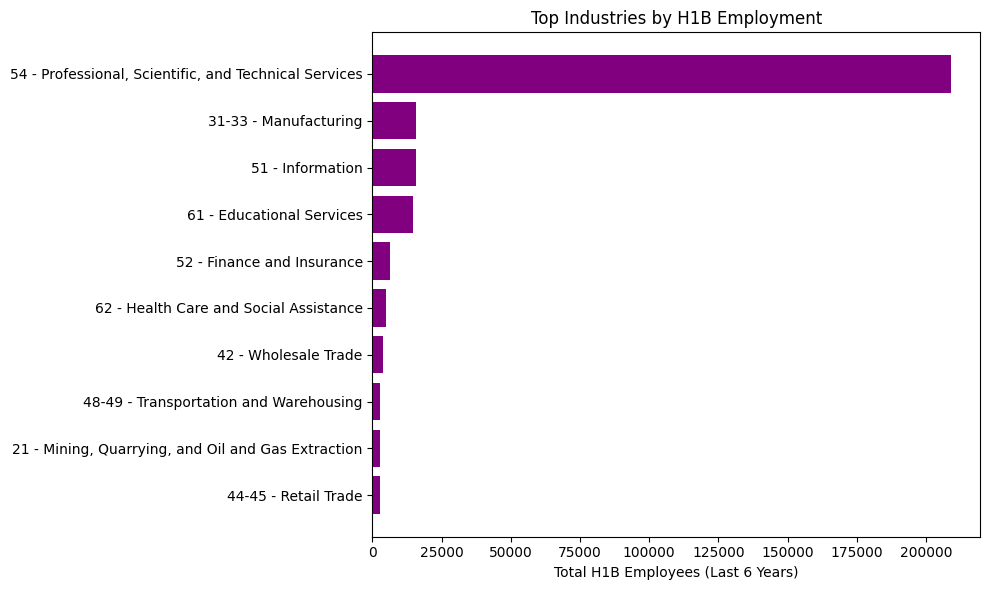

,Industry (NAICS) Code,Total Employees
0,"54 - Professional, Scientific, and Technical S...",209096


In [13]:
recent_years = sorted(empinfo['Fiscal Year'].unique())[-6:]
recent_subset = empinfo[empinfo['Fiscal Year'].isin(recent_years)]
recent_subset['Total Employees'] = recent_subset['Initial Approval'] + recent_subset['Continuing Approval']

industry_grouped = recent_subset.groupby('Industry (NAICS) Code')['Total Employees'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
plt.barh(industry_grouped['Industry (NAICS) Code'][:10][::-1], industry_grouped['Total Employees'][:10][::-1], color = 'purple' )
plt.xlabel("Total H1B Employees (Last 6 Years)")
plt.title("Top Industries by H1B Employment")
plt.tight_layout()
plt.show()

industry_grouped.head(1)


This program accepts the H1B visa information of the past six years. It calculates the number of total H1B employees for each industry, determines the top 10 industries with the maximum number of H1B employees, and then plots a horizontal bar chart to show this top 10 list. Last but not least, it outputs the top industry with the most number of H1B employees.

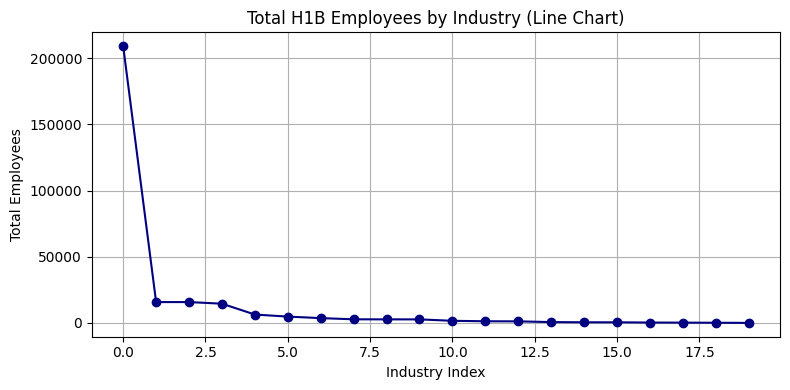

In [14]:
plt.figure(figsize=(8, 4))
plt.plot(industry_grouped['Total Employees'], marker='o', linestyle='-', color='navy')
plt.title('Total H1B Employees by Industry (Line Chart)')
plt.xlabel('Industry Index')
plt.ylabel('Total Employees')
plt.grid(True)
plt.tight_layout()
plt.show()

The code generates a line graph of overall count of H1B employees by industries. It plots a DataFrame called industry_grouped with circular markers connected by solid navy blue line. The axes are labeled, there is a title, and also there is a grid present in the chart for readability to provide an example of H1B employment trend by industries.

5. Using the subset, find the total number of H1B employees across cities. What are the top ten cities?

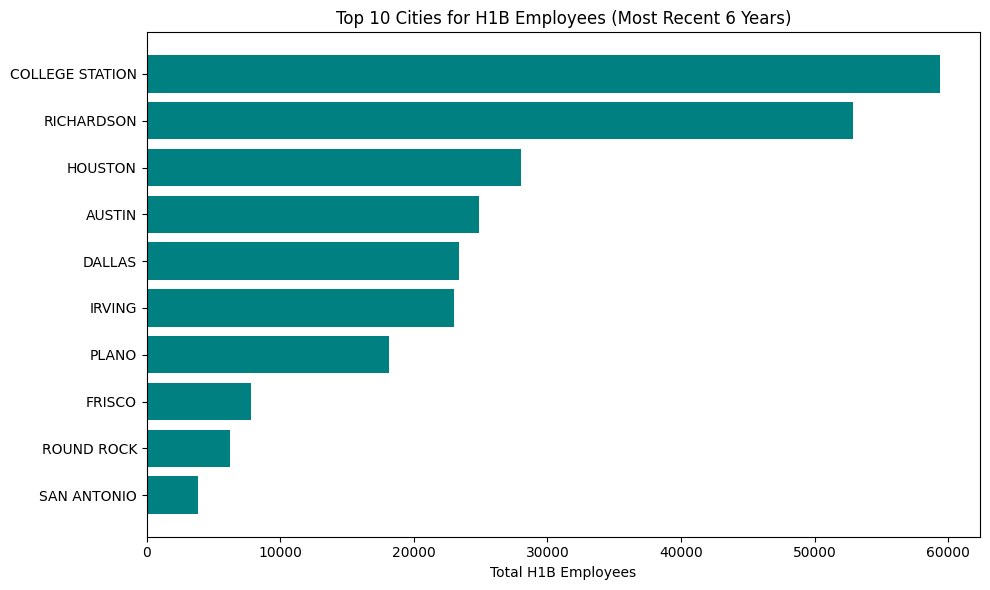

In [15]:
# Group by city and calculate total H1B employees
city_grouped = recent_subset.groupby('Petitioner City')['Total Employees'].sum().sort_values(ascending=False).reset_index()

# Plot top 10 cities
plt.figure(figsize=(10, 6))
plt.barh(city_grouped['Petitioner City'][:10][::-1], city_grouped['Total Employees'][:10][::-1], color='teal')
plt.xlabel("Total H1B Employees")
plt.title("Top 10 Cities by H1B Employment")
plt.xlabel('Total H1B Employees')
plt.title('Top 10 Cities for H1B Employees (Most Recent 6 Years)')
plt.tight_layout()
plt.show()


This code snippet is used to process H1B visa data to determine the top 10 cities that have the most H1B employees in the past six years. It then plots a horizontal bar chart to display this data, allowing one to easily view which cities have the most H1B workers concentrated.

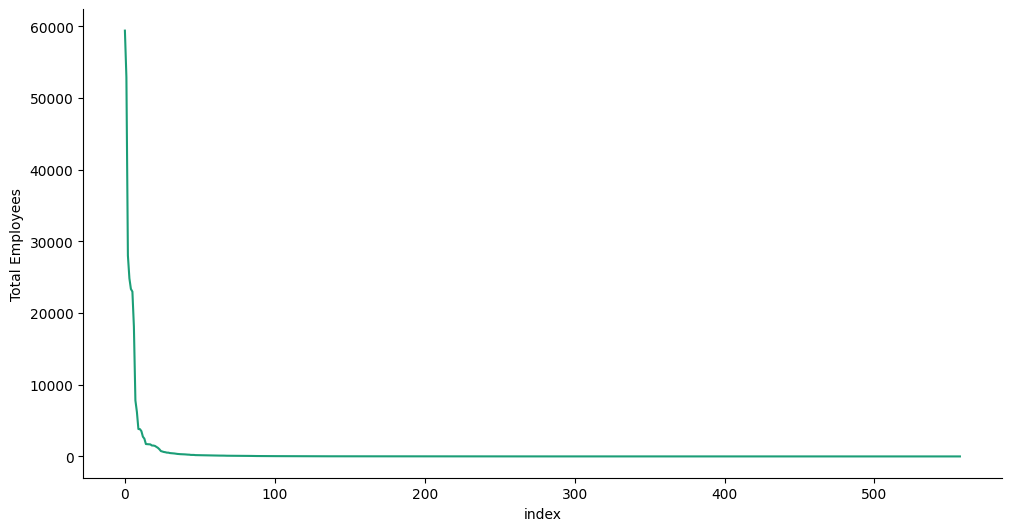

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns

def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['index']
    ys = series['Total Employees']
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

df = city_grouped.reset_index().rename(columns={'index': 'OriginalIndex'})  # Reset index and rename for clarity
df = df[['OriginalIndex', 'Petitioner City', 'Total Employees']] # Reorder columns
df = df.reset_index() # Reset index again

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Total Employees')

The following code graphs the total H1B employees by city in a line graph. The code operates on data from a DataFrame (`city_grouped`), manipulates the data to prepare it for graphing, then utilizes the matplotlib and seaborn libraries to create and customize the line graph. The graph includes the total employees graphed on the y-axis and an index for cities on the x-axis.

6. In class, we found that 'COGNIZANT' company has different names. Please replace the different names with the same name. Then using the subset, find the sum of H1B employees from each petitioner.

In [17]:
# Standardize COGNIZANT naming
recent_subset['Employer (Petitioner) Name'] = recent_subset['Employer (Petitioner) Name'].str.upper()
recent_subset['Employer (Petitioner) Name'] = recent_subset['Employer (Petitioner) Name'].replace(
    to_replace=r'^.*COGNIZANT.*$', value='COGNIZANT', regex=True
)

# Group by petitioner and sum total employees
petitioner_grouped = recent_subset.groupby('Employer (Petitioner) Name')['Total Employees'].sum().sort_values(ascending=False).reset_index()

# Index from 1 to show ranks correctly
petitioner_grouped.index = petitioner_grouped.index + 1

# Show top 10 petitioners
petitioner_grouped.head(10)


<ipython-input-17-20281343bcad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_subset['Employer (Petitioner) Name'] = recent_subset['Employer (Petitioner) Name'].str.upper()
<ipython-input-17-20281343bcad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_subset['Employer (Petitioner) Name'] = recent_subset['Employer (Petitioner) Name'].replace(


,Employer (Petitioner) Name,Total Employees
1,COGNIZANT,58936
2,INFOSYS LIMITED,46839
3,ORACLE AMERICA INC,8478
4,TESLA INC,3578
5,KPMG LLP,2989
6,HEWLETT PACKARD ENTERPRISE COMPANY,2280
7,AMERICAN AIRLINES INC,1573
8,EMC CORPORATION,1567
9,DELL USA L P,1467
10,AT&T SERVICES INC,1315


This script analyzes and preprocesses H1B visa data, with interest in the 'COGNIZANT' company. It normalizes the company name by changing the name to upper case and using regular expressions to replace its variants with 'COGNIZANT'. Then it groups the data by company name to determine the number of total H1B employees for each company and displays the top 10 companies with most H1B employees.